<a href="https://colab.research.google.com/github/SouravUpadhyay7/Data_Analysis_Projects/blob/main/Air_BnB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Collection & Cleaning: Preparing Airbnb data for analysis.
# Exploratory Data Analysis (EDA): Identifying trends, patterns, and insights in the rental market.
# Visualization: Creating stunning charts and graphs to present findings.
# Feature Engineering & Model Building: Developing predictive models for price estimation.
# Insights & Conclusion: Key takeaways and actionable findings to optimize Airbnb listings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("Air_bnb.csv", sep=',', on_bad_lines='skip')

/tmp/ipython-input-12-620782247.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Air_bnb.csv", sep=',', on_bad_lines='skip')


In [13]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60468,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
60469,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.8046,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
60470,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
60471,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [14]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [15]:
# Check for Missing Values
print(df.isnull().sum())

id                                    0
NAME                                123
host id                               0
host_identity_verified              168
host name                           170
neighbourhood group                  28
neighbourhood                        17
lat                                   9
long                                  9
country                             297
country code                        126
instant_bookable                    100
cancellation_policy                  71
room type                             4
Construction year                   173
price                               150
service fee                         171
minimum nights                      228
number of reviews                    64
last review                        9155
reviews per month                  9141
review rate number                  207
calculated host listings count      263
availability 365                    173
house_rules                       26744


In [17]:
# Handle Missing Values
'''This code ensures that the 'last review' column is properly
formatted as datetime, missing values in key columns
are appropriately handled, and incomplete records are removed,
preparing the dataset for further analysis or visualization.'''

# Convert 'last review' to datetime and handle errors
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
# Fill missing values
df.fillna({'reviews per month': 0, 'last review': df['last review'].min()}, inplace = True)
# Drop records with missing 'name' or 'host name'
df.dropna(subset=['NAME', 'host name'], inplace=True)

In [18]:
print(df.isnull().sum())

id                                    0
NAME                                  0
host id                               0
host_identity_verified              157
host name                             0
neighbourhood group                  24
neighbourhood                        16
lat                                   8
long                                  8
country                             290
country code                        116
instant_bookable                     90
cancellation_policy                  64
room type                             3
Construction year                   159
price                               144
service fee                         165
minimum nights                      221
number of reviews                    62
last review                           0
reviews per month                     0
review rate number                  194
calculated host listings count      261
availability 365                    144
house_rules                       26632


In [20]:
# Check Data Types
print(df.dtypes)

id                                         int64
NAME                                      object
host id                                   object
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                       object
long                                      object
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                    float64
service fee                               object
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month   

In [21]:
df.drop_duplicates(inplace=True)


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60039 entries, 0 to 60347
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              60039 non-null  int64         
 1   NAME                            60039 non-null  object        
 2   host id                         60039 non-null  object        
 3   host_identity_verified          59882 non-null  object        
 4   host name                       60039 non-null  object        
 5   neighbourhood group             60015 non-null  object        
 6   neighbourhood                   60023 non-null  object        
 7   lat                             60031 non-null  object        
 8   long                            60031 non-null  object        
 9   country                         59749 non-null  object        
 10  country code                    59923 non-null  object        
 11  instant

In [23]:
df = df.drop(columns=["license", "house_rules"], errors='ignore')

In [24]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,2005.0,620.0,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.975,United States,...,2013.0,577.0,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60343,20408606,South Williamsburg Condo - Rooftop & Balcony,653456847,unconfirmed,Julie,Brooklyn,Williamsburg,40.71113,-73.96181,United States,...,2007.0,62.0,$12,3.0,1.0,2018-09-30,0.11,3.0,1.0,9.0
60344,20409158,Spacious Private Room near Train and Prospect ...,6628038945,unconfirmed,Aaron,Brooklyn,Prospect-Lefferts Gardens,40.65815,-73.95546,United States,...,2015.0,452.0,$90,31.0,3.0,2019-06-01,0.45,4.0,2.0,84.0
60345,20409710,Sunny Apt in Brooklyn Close to Prospect Park,50600643853,unconfirmed,Sophia,Brooklyn,Kensington,40.63472,-73.97268,United States,...,2021.0,804.0,$161,3.0,2.0,2019-01-01,0.19,3.0,1.0,281.0
60346,20410263,Park Slope Perfect 2 BR,63607701014,verified,Dani,Brooklyn,South Slope,40.66875,-73.98779,United States,...,2006.0,1066.0,$213,31.0,1.0,2019-05-24,0.64,4.0,2.0,281.0


In [25]:
df.describe()


,id,Construction year,price,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,6.003900e+04,59880.000000,59895.000000,59827.000000,59977.000000,60039,60039.000000,59845.000000,59778.000000,59895.000000
mean,3.159561e+07,2012.412943,624.140429,7.948624,30.159811,2017-10-17 16:02:09.515814912,0.990354,3.131155,5.238867,138.430937
min,1.001254e+06,1.000000,28.000000,-125.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,9.344104e+06,2007.000000,338.000000,2.000000,2.000000,2016-11-26 00:00:00,0.060000,2.000000,1.000000,0.000000
50%,4.069624e+07,2012.000000,621.000000,3.000000,8.000000,2019-01-02 00:00:00,0.330000,3.000000,1.000000,93.000000
75%,4.904950e+07,2017.000000,913.000000,5.000000,37.000000,2019-06-20 00:00:00,1.360000,4.000000,2.000000,263.000000
max,5.736742e+07,2022.000000,1200.000000,3455.000000,629.000000,2058-06-16 00:00:00,358.000000,5.000000,332.000000,3677.000000
std,2.005511e+07,12.905465,332.251561,25.850944,50.164145,NaN,2.060594,1.363204,22.732154,137.410529


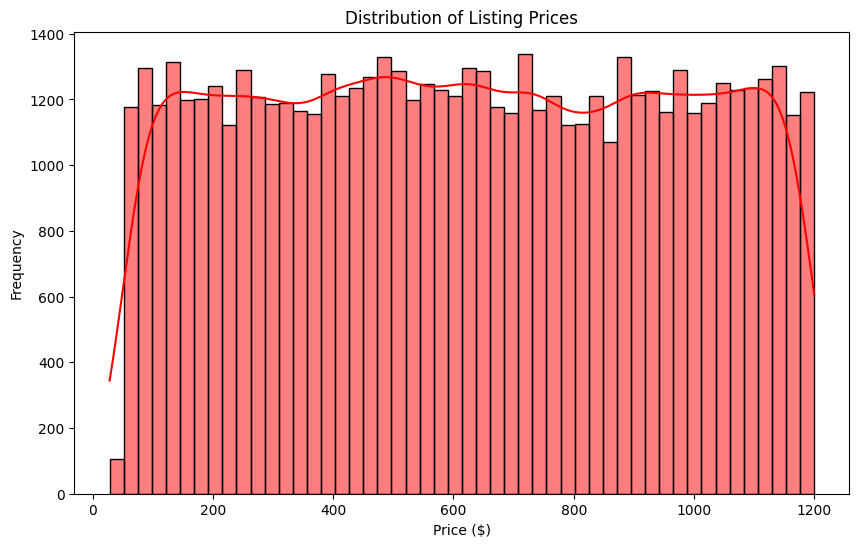

In [26]:
# Plot the distribution of listing prices.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='red') # Set histogram color
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


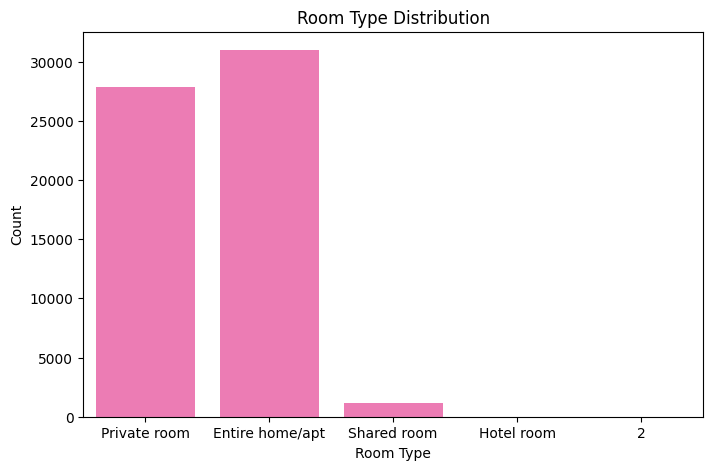

In [27]:
# Analyze the distribution of different room types.
plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=df , color='hotpink')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

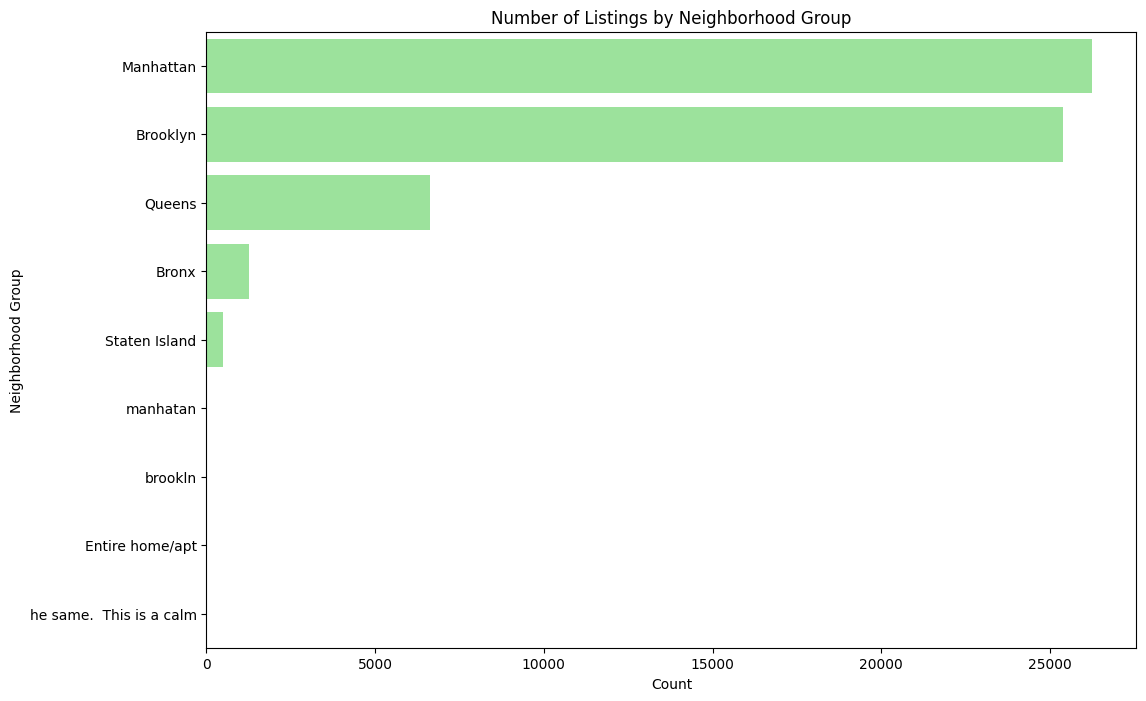

In [29]:
# Examine how listings are distributed across different neighborhoods.
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood group', data=df,color="lightgreen" , order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

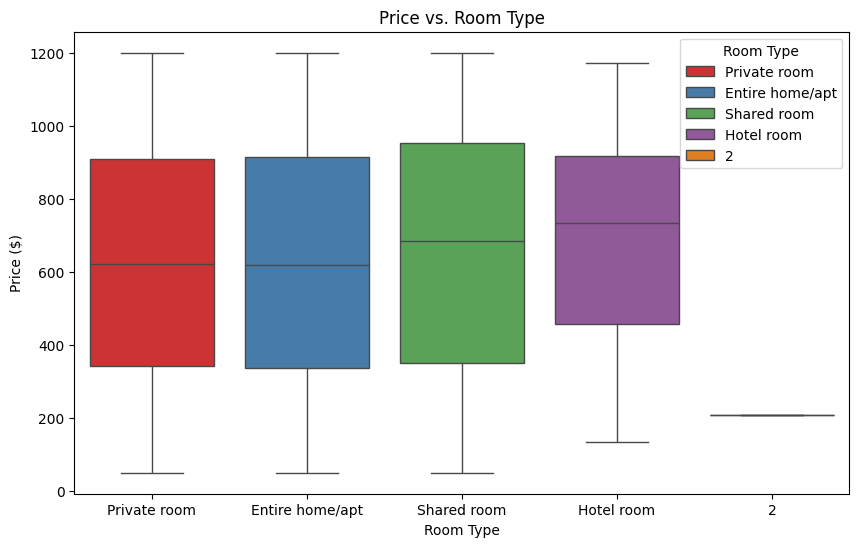

In [30]:
# Visualize the relationship between price and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='Set1')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.show()


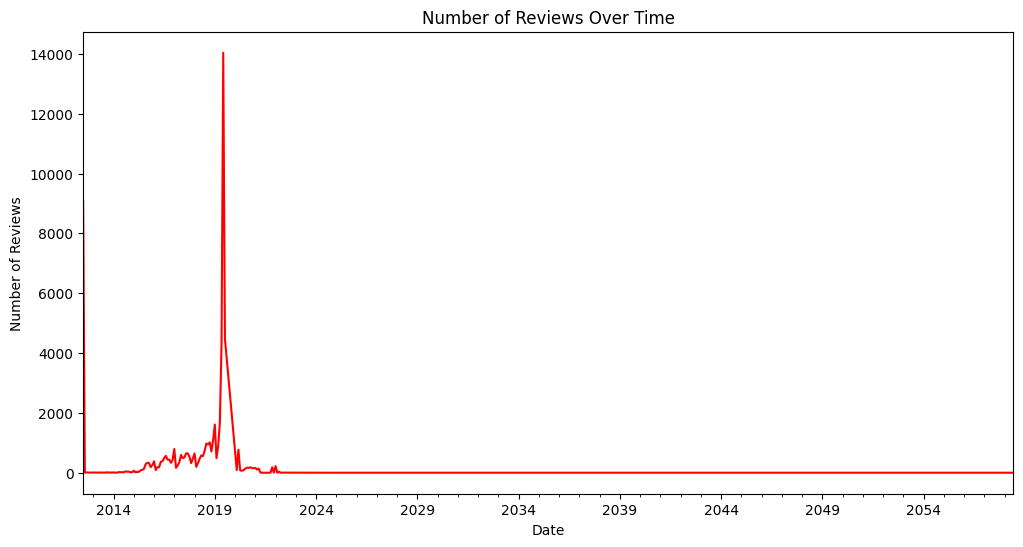

In [31]:
# Plot the number of reviews over time.
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


The line plot provides a clear visualization
of the number of reviews over time.
It helps identify trends and patterns in review activity,
such as periods of high or low activity.
This information can be useful for understanding
 the dynamics of user engagement and the popularity
of Airbnb listings over time. The significant spikes
and drops in reviews might be worth further investigation
 to understand the underlying causes, such as changes
 in Airbnb policies, market conditions, or external events.
